In [1]:
import shutil
import os

shutil.copy2('./measdata/Spin_Echo_Flip_emulator_result.csv', 
             './measdata/State1.csv')
shutil.copy2('./measdata/Spin_Echo_Identity_emulator_result.csv', 
             './measdata/State0.csv')


'./measdata/State0.csv'

Loaded 8192 shots for State 0.
Loaded 8192 shots for State 1.

--- Starting Calibration ---
Calibrating |0> state...
   Using 8192 shots split into 16 points for KDE.
Inferring Qubit 1 for State |0>
Given Lambda |0>: success rate = 0.9330


/Users/chardiol/Desktop/Pawsey!/UnNoiseCompile/.venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


<Figure size 640x480 with 0 Axes>

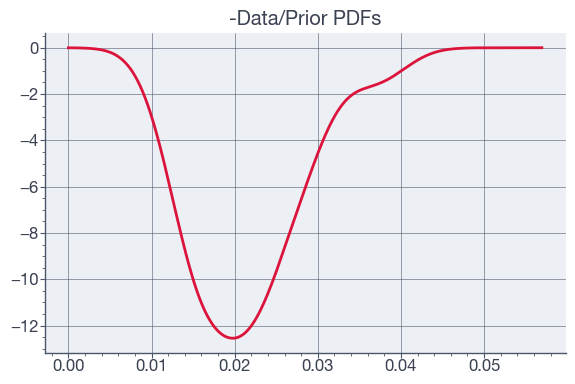

   Accepted N: 3268 (8.2%)
Inferring Qubit 2 for State |0>
Given Lambda |0>: success rate = 0.9050


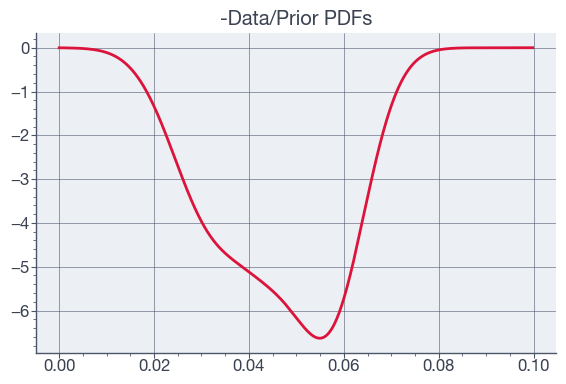

   Accepted N: 6013 (15.0%)
Inferring Qubit 3 for State |0>
Given Lambda |0>: success rate = 0.9650


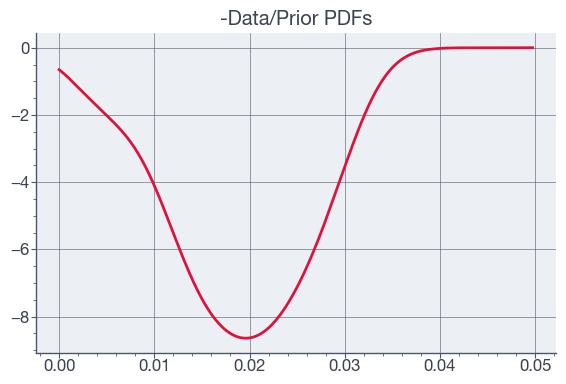

   Accepted N: 4826 (12.1%)
Calibrating |1> state...
   Using 8192 shots split into 16 points for KDE.
Inferring Qubit 1 for State |1>
Given Lambda |1>: success rate = 0.9280


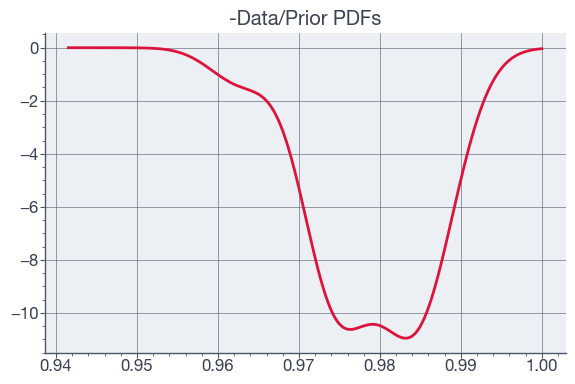

   Accepted N: 3775 (9.4%)
Inferring Qubit 2 for State |1>
Given Lambda |1>: success rate = 0.9150


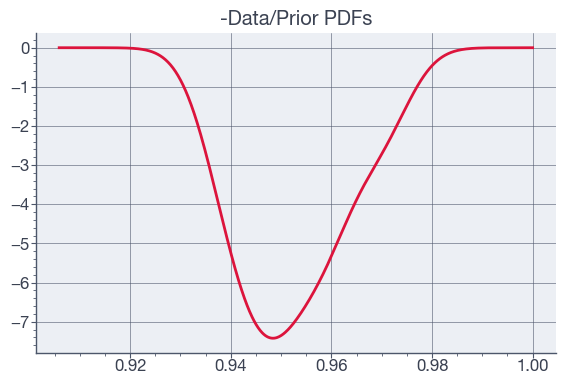

   Accepted N: 5318 (13.3%)
Inferring Qubit 3 for State |1>
Given Lambda |1>: success rate = 0.9950


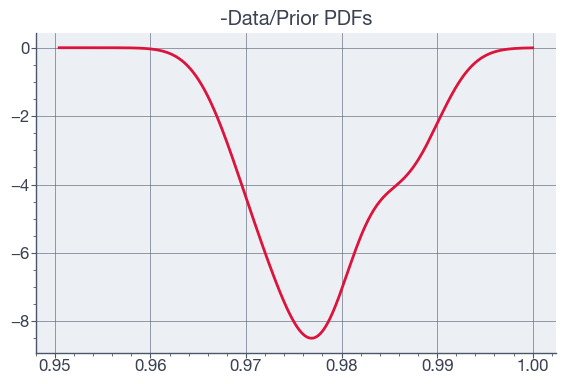

   Accepted N: 4743 (11.9%)
Inference Complete, Saving Results...
Saved Full Posterior to:
measdata/Post_Full_20260119_101444.json
and
measdata/Post_Full_Current.json
Saved Mean/Mode Summary to:
measdata/Post_MeanMode_20260119_101444.json
and
measdata/Post_MeanMode_Current.json


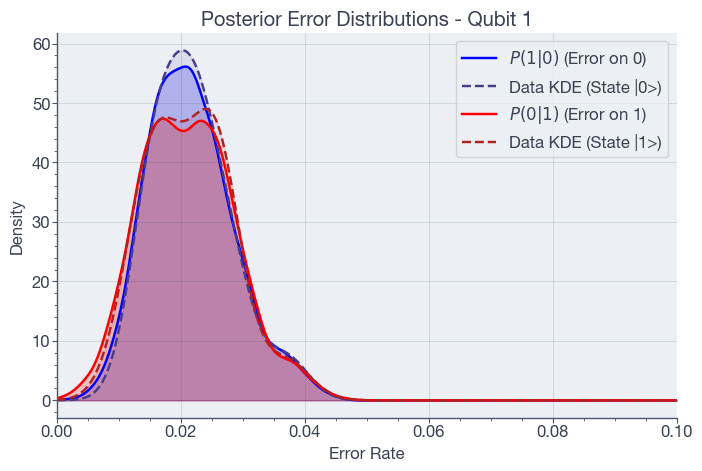

--- Qubit 1 Summary ---
Error on |0>: 0.0216 (95% CI: 0.0097 - 0.0376)
Error on |1>: 0.0212 (95% CI: 0.0079 - 0.0379)
------------------------------


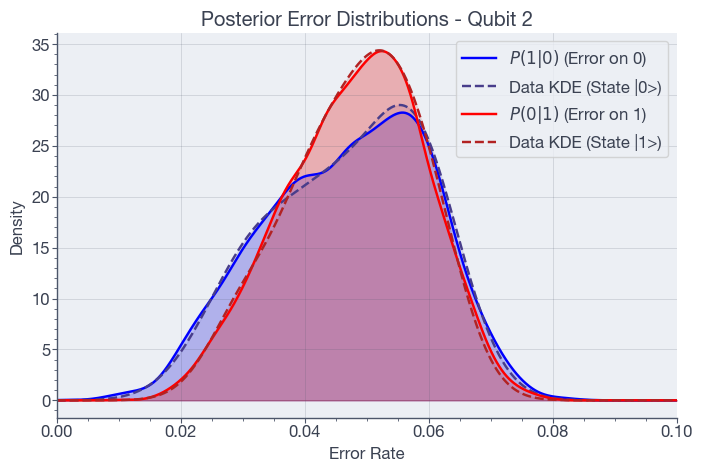

--- Qubit 2 Summary ---
Error on |0>: 0.0470 (95% CI: 0.0208 - 0.0697)
Error on |1>: 0.0481 (95% CI: 0.0254 - 0.0679)
------------------------------


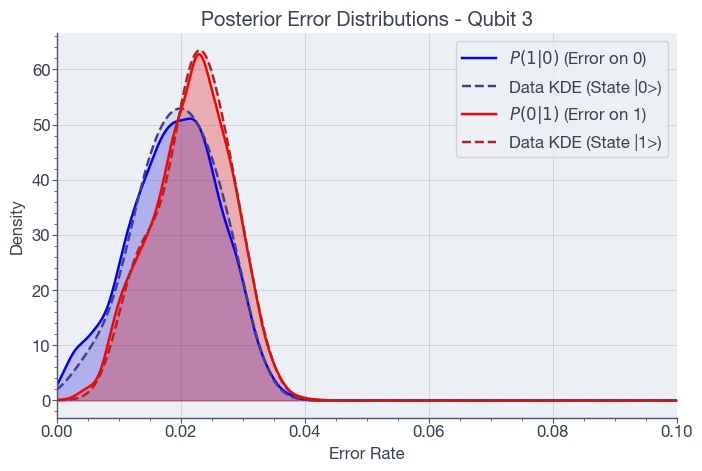

--- Qubit 3 Summary ---
Error on |0>: 0.0190 (95% CI: 0.0035 - 0.0321)
Error on |1>: 0.0218 (95% CI: 0.0089 - 0.0334)
------------------------------
Inference Complete.


In [2]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='measdata/')

print("\n--- Starting Calibration ---")

## providing the true errors which I used to simulate the data in samples/CZ_test.ipynb
my_filter.params = {
    'Qubit1': {'err0': 0.067, 'err1': 0.072},
    'Qubit2': {'err0': 0.095, 'err1': 0.085},
    'Qubit3': {'err0': 0.035, 'err1': 0.005}
}

# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.inference(num_points = 16, prep_state='0', nPrior=40000, prior_sd= 0.1)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.inference(num_points = 16,prep_state='1', nPrior=40000, prior_sd= 0.1)

print("Inference Complete.")

In [3]:
my_filter.params

{'Qubit1': {'err0': 0.067, 'err1': 0.072},
 'Qubit2': {'err0': 0.095, 'err1': 0.085},
 'Qubit3': {'err0': 0.035, 'err1': 0.005}}

In [4]:
qubit_set = {('1', '2'),
 ('14', '22'),
 ('15', '23'),
 ('17', '18'),
 ('19', '27'),
 ('20', '28'),
 ('21', '29'),
 ('24', '32'),
 ('25', '33'),
 ('26', '34'),
 ('3', '4'),
 ('30', '31'),
 ('35', '43'),
 ('36', '44'),
 ('37', '45'),
 ('38', '39'),
 ('41', '47'),
 ('48', '52'),
 ('49', '53'),
 ('5', '11'),
 ('50', '54'),
 ('6', '12'),
 ('8', '16'),
 ('9', '10')}